### Weekly Demand Data (train.csv):

- **id**: Unique ID assigned to each entry
- **week**: Week number for the recorded data
- **center_id**: Unique ID for the fulfillment center
- **meal_id**: Unique ID for the meal served
- **checkout_price**: Final price of the meal, including discounts and charges
- **base_price**: Initial price of the meal
- **emailer_for_promotion**: Indicates whether an emailer was sent for promotion
- **homepage_featured**: Indicates if the meal was featured on the homepage
- **num_orders**: Target variable - Count of orders for the meal

### Fulfillment Center Information (fulfilment_center_info.csv):

- **center_id**: Unique ID for the fulfillment center
- **city_code**: Unique code for the city where the center is located
- **region_code**: Unique code for the region
- **center_type**: Anonymized type of the center
- **op_area**: Operational area of the center (in km^2)

### Meal Information (meal_info.csv):

- **meal_id**: Unique ID for the meal
- **category**: Category of the meal (e.g., beverages, snacks, soups)
- **cuisine**: Cuisine type of the meal (e.g., Indian, Italian)

In [2]:
# Import modules for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the datasets
center_info = pd.read_csv('./data/fulfilment_center_info.csv')
meal_info = pd.read_csv('./data/meal_info.csv')
test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')

In [5]:
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [9]:
# Summary statistics
print("\nSummary Statistics for Train Data:")
train_data.describe()


Summary Statistics for Train Data:


,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [11]:
# Dropping irrelevant col for this analysis
train_data = train_data.drop("center_id", axis=1)
test_data = test_data.drop("center_id", axis=1)
data = train_data
# Merge data with meal_info
data = pd.merge(data, meal_info, how='inner', on='meal_id').sort_values(by=['week'])
data

,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,1885,136.83,152.29,0,0,177,Beverages,Thai
127961,1348802,1,2290,291.97,293.97,0,0,473,Rice Bowl,Indian
127960,1032714,1,2290,298.82,297.82,0,0,649,Rice Bowl,Indian
127959,1393227,1,2290,297.82,296.82,0,0,325,Rice Bowl,Indian
127958,1044078,1,2290,301.73,299.73,0,0,419,Rice Bowl,Indian
...,...,...,...,...,...,...,...,...,...,...
427605,1480468,145,2664,242.53,306.52,0,1,837,Salad,Italian
427604,1379816,145,2664,251.23,337.62,0,0,312,Salad,Italian
427603,1119335,145,2664,242.53,338.56,0,0,676,Salad,Italian
427601,1181368,145,2664,242.53,338.56,0,0,215,Salad,Italian


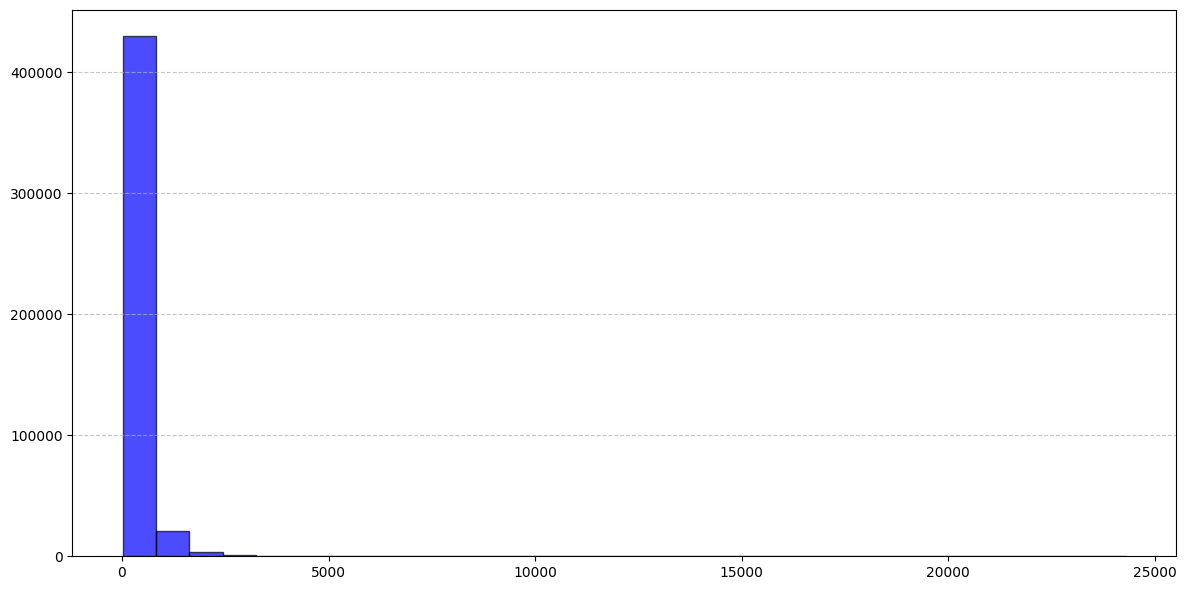

In [15]:
# Looking histo of target 
plt.figure(figsize=(12, 6))
plt.hist(train_data['num_orders'], bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

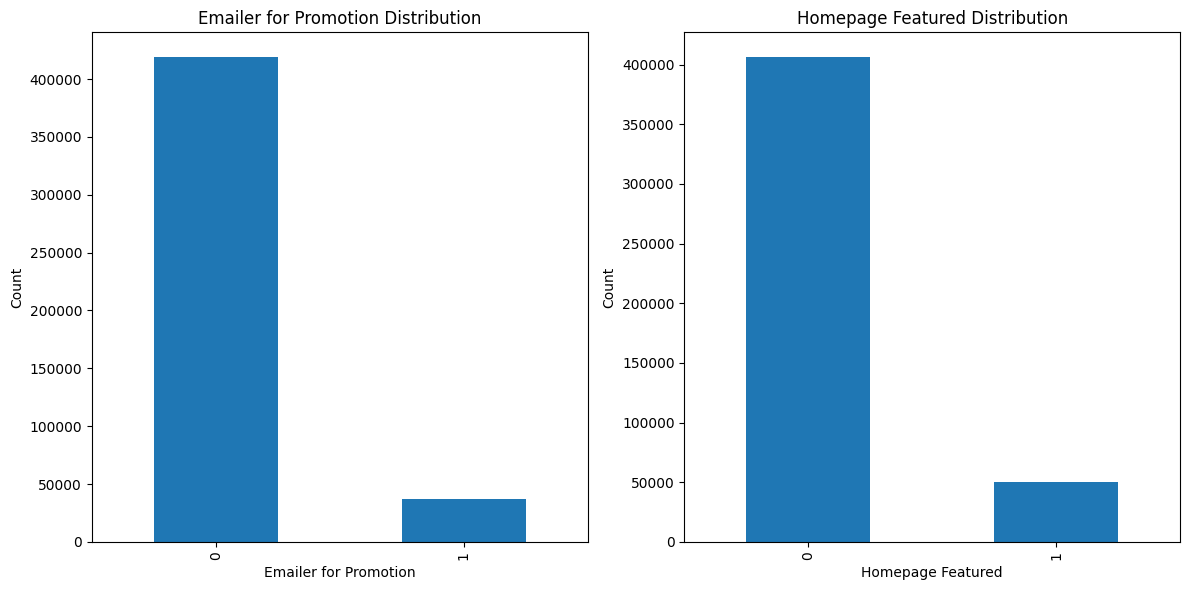

In [16]:
# Explore categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_data['emailer_for_promotion'].value_counts().plot(kind='bar')
plt.xlabel('Emailer for Promotion')
plt.ylabel('Count')
plt.title('Emailer for Promotion Distribution')

plt.subplot(1, 2, 2)
train_data['homepage_featured'].value_counts().plot(kind='bar')
plt.xlabel('Homepage Featured')
plt.ylabel('Count')
plt.title('Homepage Featured Distribution')
plt.tight_layout()
plt.show()

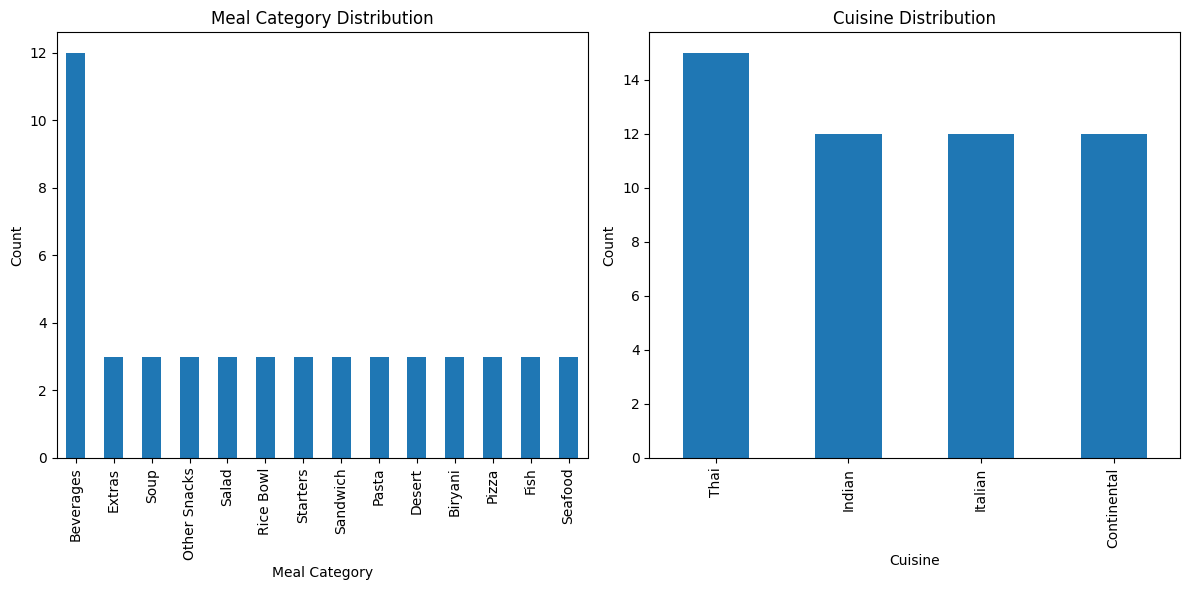

In [17]:
# Explore meal categories and cuisines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
meal_info['category'].value_counts().plot(kind='bar')
plt.xlabel('Meal Category')
plt.ylabel('Count')
plt.title('Meal Category Distribution')

plt.subplot(1, 2, 2)
meal_info['cuisine'].value_counts().plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Cuisine Distribution')
plt.tight_layout()
plt.show()